# Logistic Regression Project (Predict Ad click)

In this notebook we will use `Logistic Regression` to indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* '`Daily Time Spent on Site`': consumer time on site in minutes
* '`Age`': cutomer age in years
* '`Area Income`': Avg. Income of geographical area of consumer
* '`Daily Internet Usage`': Avg. minutes a day consumer is on the internet
* '`Ad Topic Line`': Headline of the advertisement
* '`City`': City of consumer
* '`Male`': Whether or not consumer was male
* '`Country`': Country of consumer
* '`Timestamp`': Time at which consumer clicked on Ad or closed window
* '`Clicked on Ad`': 0 or 1 indicated clicking on Ad

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

## Get the Data

In [2]:
path = 'data/advertising.csv'
df = pd.read_csv(path)
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


# 1. Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [4]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [5]:
df['Timestamp']= pd.to_datetime(df.Timestamp)
df['Timestamp'] = df['Timestamp'].dt.strftime('%Y-%m-%d')
df['Min_day'] = df['Timestamp'].min()
df['Timestamp']= pd.to_datetime(df.Timestamp)
df['Min_day']= pd.to_datetime(df.Min_day)

In [6]:
df['Days'] = (df['Timestamp'] - df['Min_day'].min()).dt.days
df['Days'].sort_values()

337      0
930      0
520      0
452      0
967      0
      ... 
117    204
173    204
639    204
941    204
580    205
Name: Days, Length: 1000, dtype: int64

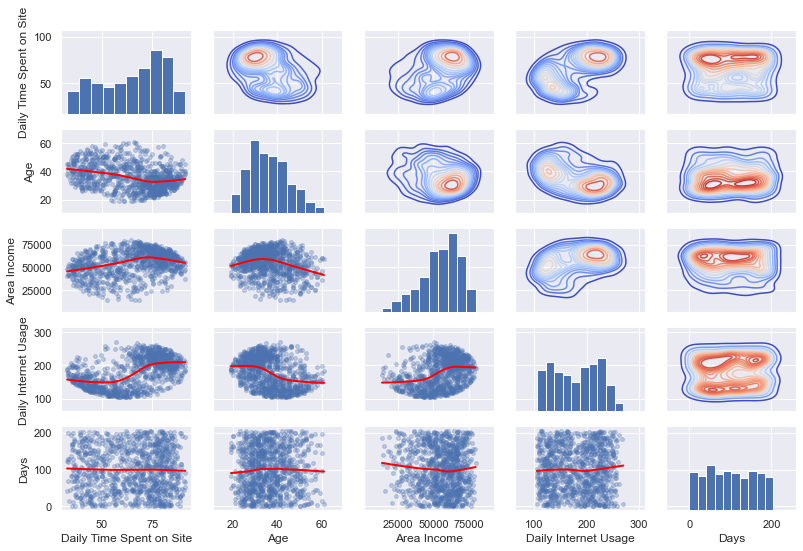

In [7]:
sns.set(rc={'figure.figsize':(11,8)})
g = sns.PairGrid(df[['Daily Time Spent on Site', 'Age','Area Income', 'Daily Internet Usage', 'Days']], height=1.5, aspect=1.5)
g = g.map_diag(plt.hist)
g = g.map_lower(sns.regplot, lowess=True, scatter_kws={'s': 15, 'alpha':0.3}, 
                line_kws={'color':'red', 'linewidth': 2})
g = g.map_upper(sns.kdeplot, n_levels=15, cmap='coolwarm')
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
plt.show()

# 2. Prepare Data for Logistic Regression


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df[['Daily Time Spent on Site', 'Age', 
             'Area Income','Daily Internet Usage', 'Days']]
y = df['Clicked on Ad']


#### 1. Train test split


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)


In [11]:
X_test

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Days
698,86.76,28,48679.54,189.91,40
577,81.21,36,63394.41,233.04,1
763,52.35,25,33293.78,147.61,156
790,36.98,31,39552.49,167.87,76
520,46.61,42,65856.74,136.18,0
...,...,...,...,...,...
127,89.05,45,57868.44,206.98,93
924,59.64,51,71455.62,153.12,123
632,70.13,31,70889.68,224.98,136
869,82.41,36,65882.81,222.08,102


In [12]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [14]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()


#### 2. StandardScaler()


In [15]:
from sklearn.preprocessing import StandardScaler

# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# 3. Implement Logistic Regression in Scikit-Learn and predict

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [36]:
from sklearn.model_selection import KFold, cross_val_score

# Splitting the data for Cross-Validation
kfold = KFold(n_splits=10)
cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

print('Cross-Validation Score:', cv_results, "\n", cv_results.mean())

Cross-Validation Score: [0.9625 0.95   0.9625 0.9875 1.     0.95   0.95   0.9875 0.9375 0.9875] 
 0.9675


# 4. Evaluate models


In [18]:
predictions = model.predict(X_test)

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       100
           1       0.94      0.96      0.95       100

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



In [20]:
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)


#### 1. Confusion Matrix


In [21]:
from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(y_test, predictions)
print(c_matrix)

[[94  6]
 [ 4 96]]


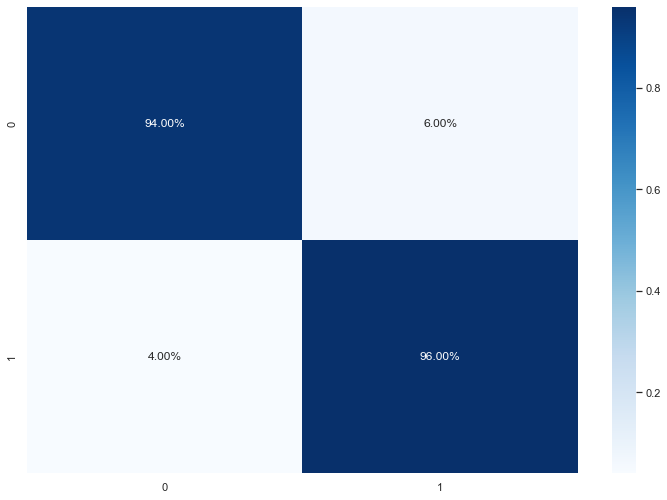

In [22]:
sns.heatmap(c_matrix/np.sum(c_matrix,axis=1), annot=True, 
            fmt='.2%', cmap='Blues');


#### 2. Precision


In [23]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [24]:
precision_test = precision_score(y_test, predictions)
print(precision_test)

0.9411764705882353




#### 3. Recall


In [25]:
recall_test = recall_score(y_test, predictions)
print(recall_test)

0.96




#### 4. F1 Score


In [26]:
f1_test = f1_score(y_test, predictions)
print(f1_test)

0.9504950495049505


accuracy

In [27]:
accuracy_test = accuracy_score(y_test, predictions)
print(accuracy_test)

0.95




#### 5. ROC curve

In [28]:
from sklearn.metrics import roc_curve
# Calculate probability score of each point in training set
y_train_score = model.decision_function(X_train)
# Calculate false positive rate(fpr), true pos. rate (tpr), and thresholds for train set
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_hat_train)
# Calculate probability score of each point in test set
y_test_score = model.decision_function(X_test)
# Calculate fpr, tpr, and thresholds for test set
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_hat_test)

([<matplotlib.axis.YTick at 0x247ad3cbd48>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

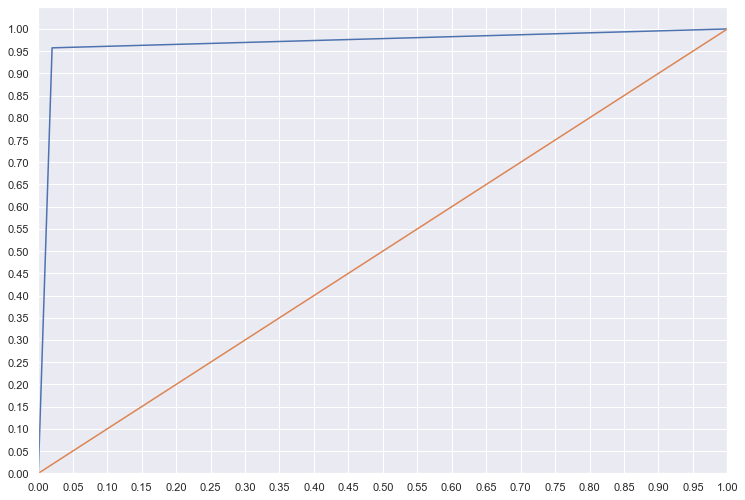

In [29]:
# Plot the training FPR and TPR
plt.plot(train_fpr, train_tpr, label = 'ROC Curve')
# Plot positive sloped 1:1 line for reference
plt.plot([0,1],[0,1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks([i/20.0 for i in range(21)])
plt.yticks([i/20.0 for i in range(21)])

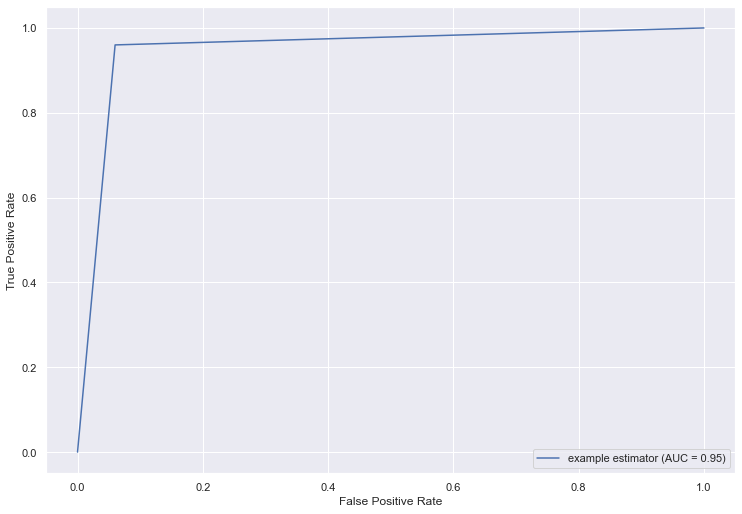

In [30]:
from sklearn import metrics

# Plotting ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()

plt.show()

In [34]:
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification

model = LogisticRegression()
model.fit(X_train, y_train)
y_score = model.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

# 5. Conclusions

Construí un modelo bastante fuerte de primeras, pero la construcción de cualquier modelo de aprendizaje automático es un proceso iterativo y el modelado de clasificación en sí tiene varios tipos de modelos.